IntSlider(value=12345, description='Seed', max=99999)

FloatSlider(value=1.0, description='a', max=10.0)

IntSlider(value=-1, description='Closed value', max=10, min=-10)

FloatSlider(value=6.0, description='Closed avg time')

IntSlider(value=1, description='Opened value', max=10, min=-10)

FloatSlider(value=2.0, description='Opened avg time')

FloatSlider(value=2.0, description='D', min=0.1)

SelectionSlider(description='Delta t', index=1, options=(0.1, 0.01, 0.001, 0.0001), value=0.01)

IntSlider(value=50000, description='Records', max=100000, min=1000, step=1000)

VBox()

Checkbox(value=True, description='Takes previous values')

Dropdown(description='Random Force', options=('Gauss', 'Levy'), value='Gauss')

Dropdown(description='Autocorrelation method', index=2, options=('DFA', 'FFT', 'Both'), value='Both')

Button(description='Run Model', style=ButtonStyle())

Button Clicked


<Figure size 640x480 with 0 Axes>

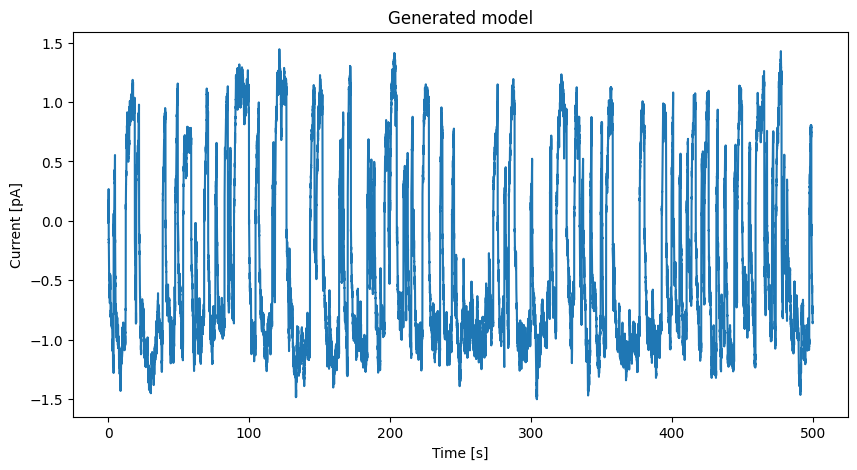

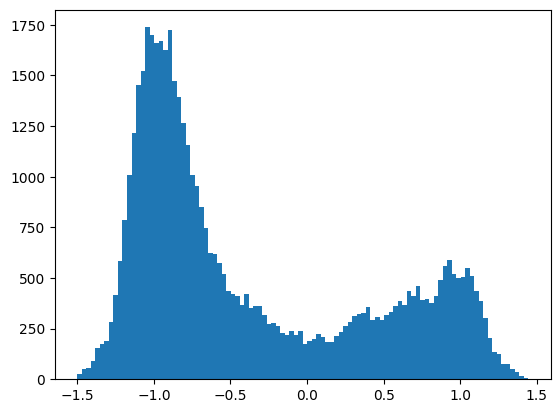

a: 1.0, closed_0: -1, closed_1: 6.0, opened_0: 1, opened_1: 2.0, D: 2.0, delta_t: 0.01, records: 50000, random_force: Levy, force_params: alpha: 1.9, beta_closed: 1.0, beta_opened: -1.0, location: 0, scale: 0.1 seed: 12345


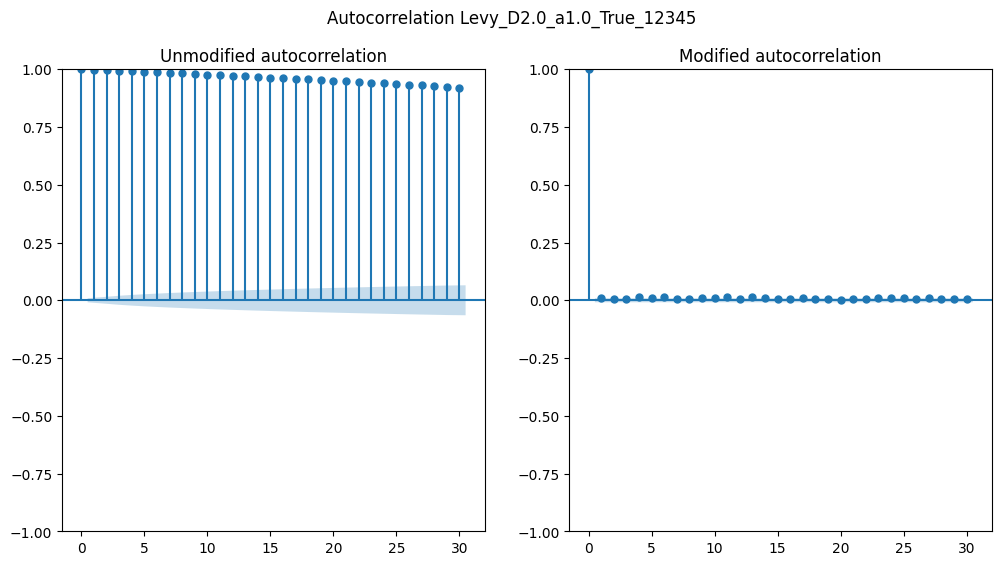

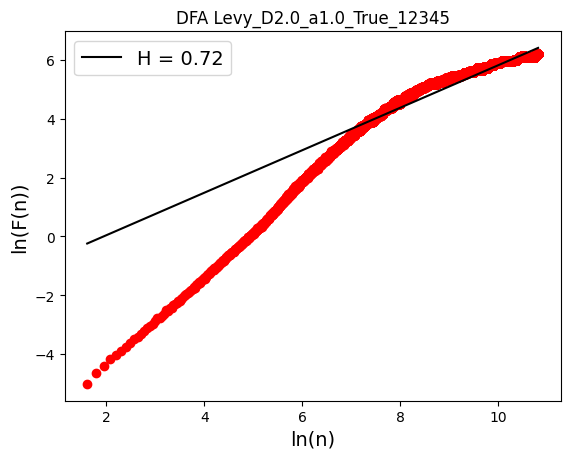

In [1]:
from ion_channel import InteractiveIonChannel

IIC = InteractiveIonChannel()
IIC.interact()

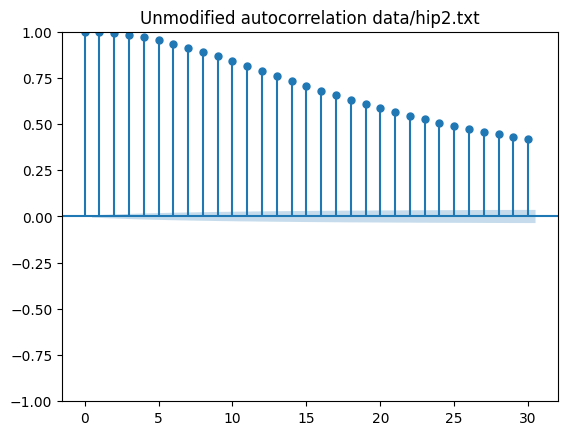

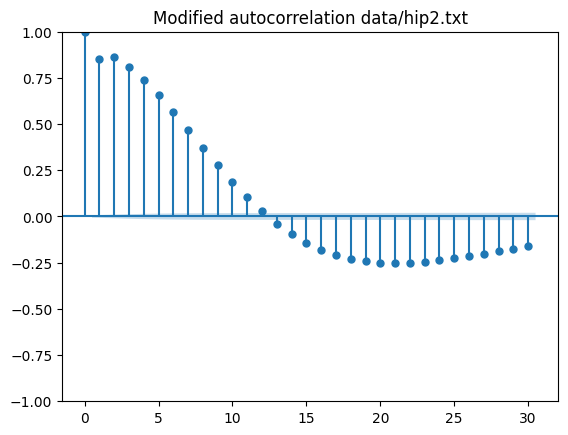

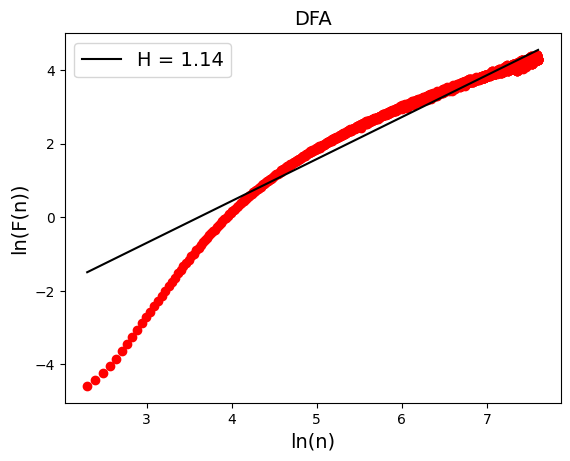

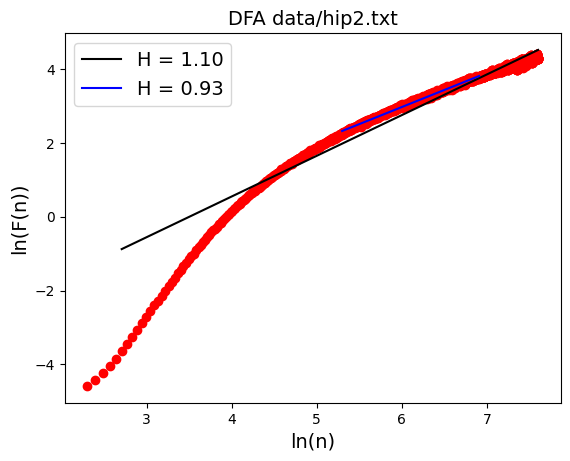

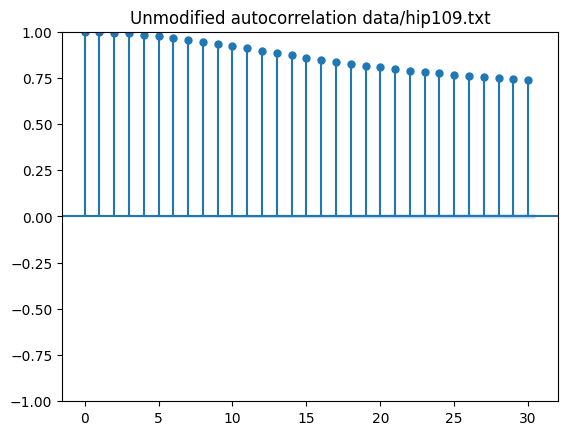

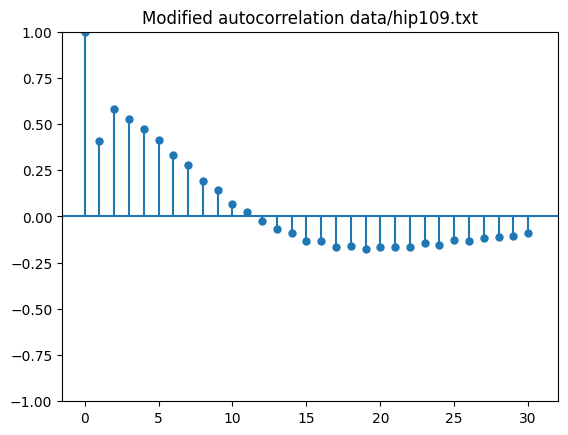

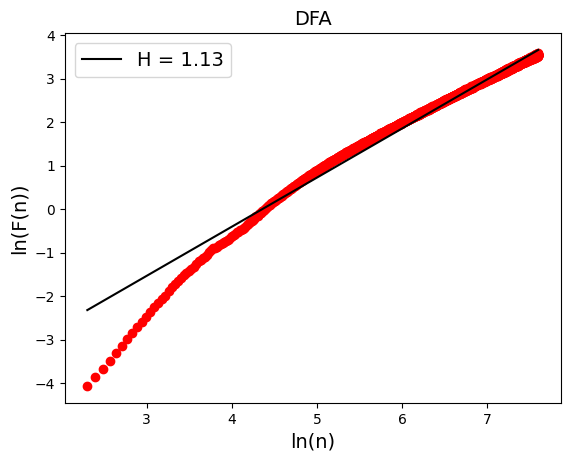

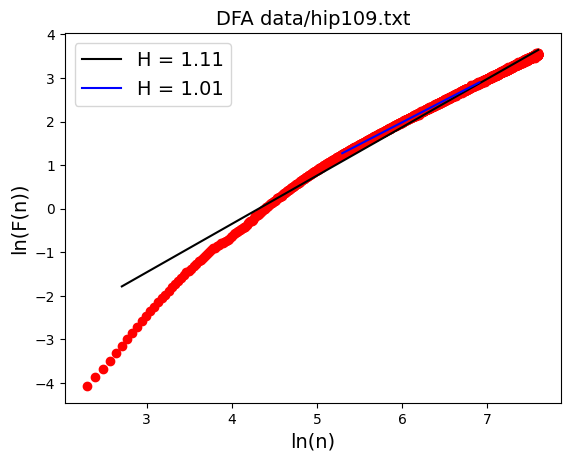

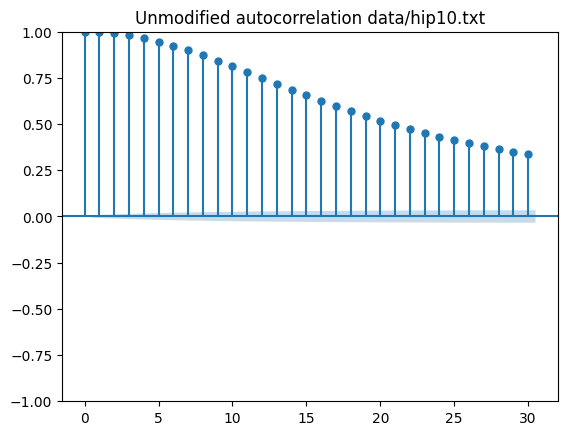

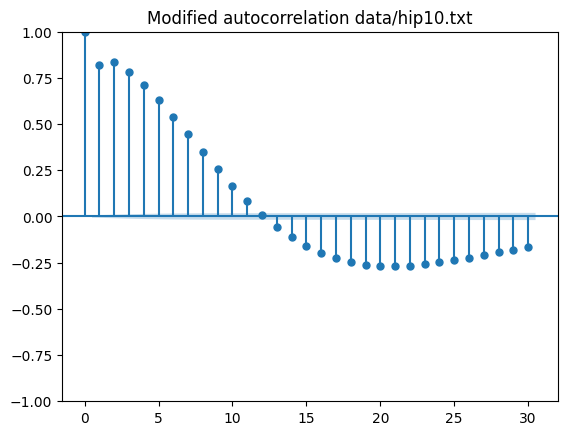

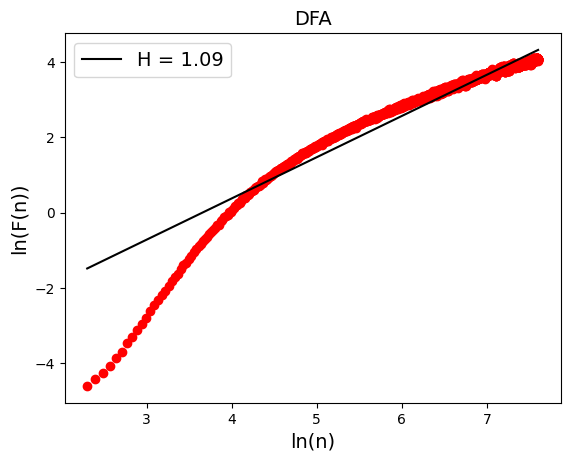

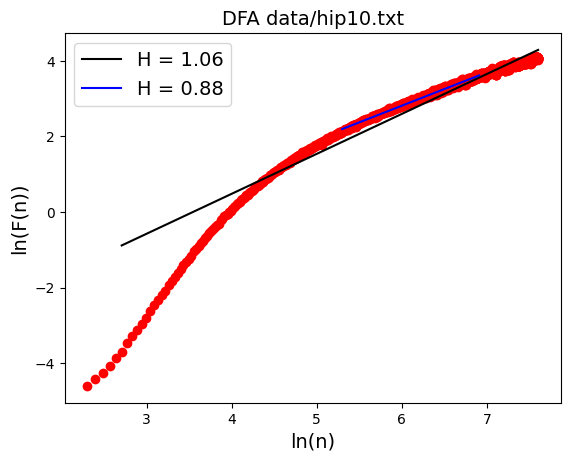

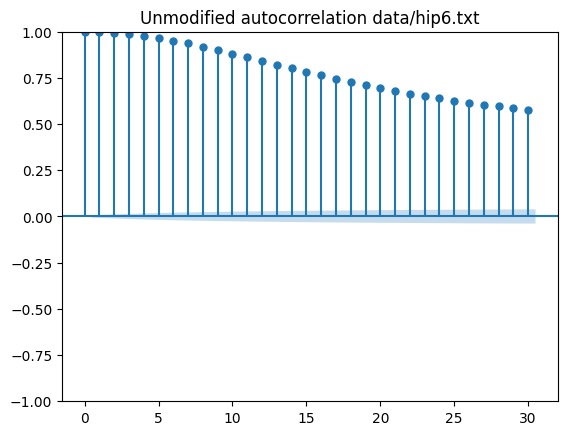

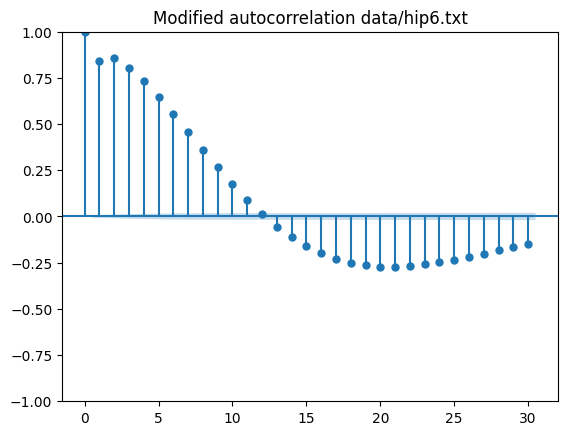

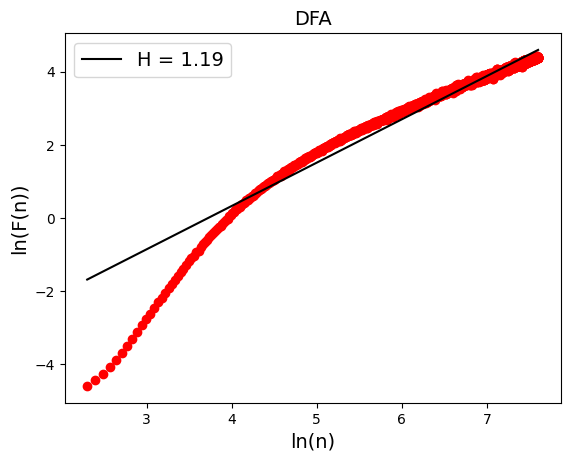

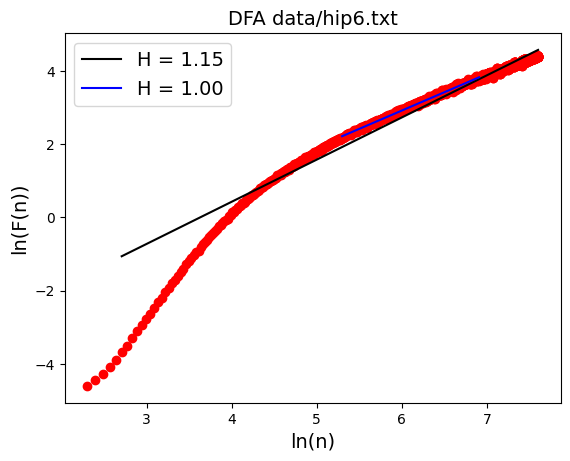

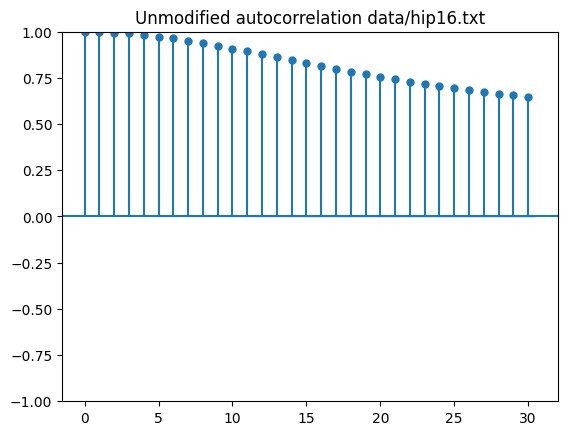

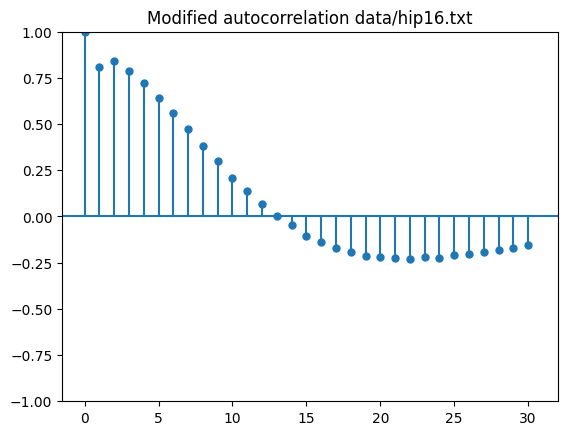

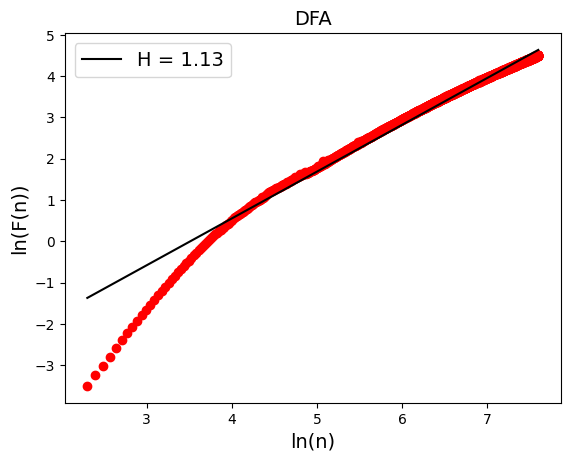

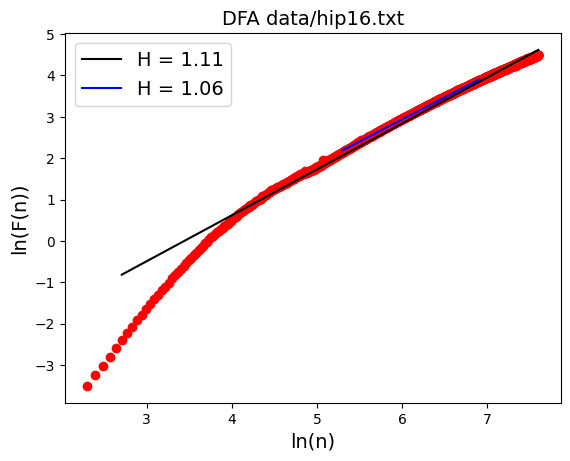

In [1]:
import os
import glob
import matplotlib.pyplot as plt
from monostable_model import calculate_autocorelation_dfa, calculate_autocorelation_acf
import numpy as np

# Find all hip files in the data directory
file_pattern = os.path.join("data", "hip*.txt")
files = glob.glob(file_pattern)
batch_size = 1
# Process each file
for file_path in files:
    cnt = 0
    sum = 0
    file_data = []
    
    with open(file_path) as data_file:
        for record in data_file:
            if cnt < batch_size:
                record = record.strip()
                sum += float(record)
                cnt += 1
            else:
                cnt = 0
                file_data.append(sum / batch_size)
                sum = 0
    
    # Calculate autocorrelation
    calculate_autocorelation_acf(file_data, title=file_path)
    calculate_autocorelation_dfa(file_data, title=file_path)

In [6]:
from ion_channel import IonChannel
IC = IonChannel()
IC.random_force_gauss(1,True)

array([-0.10067963])

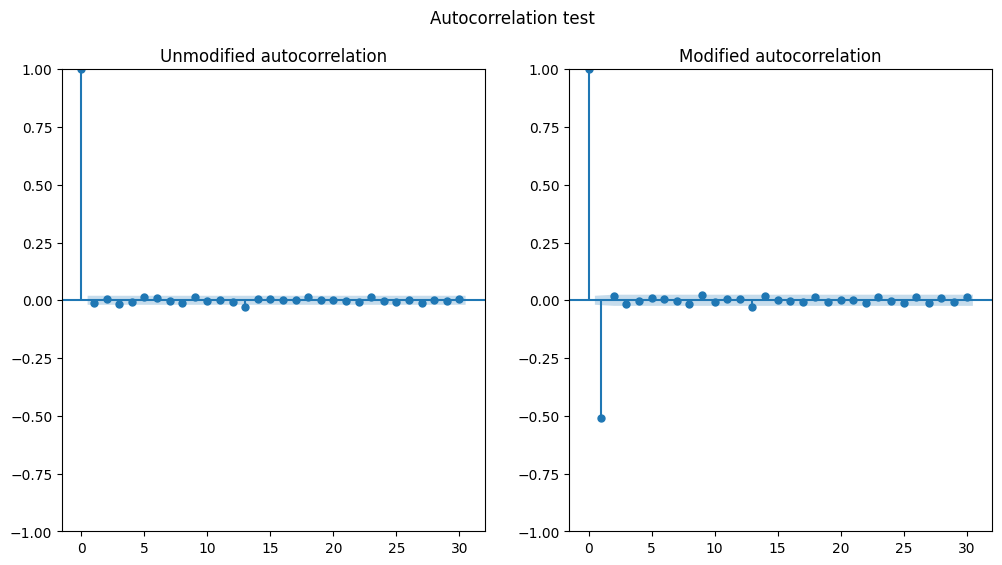

In [1]:
import numpy as np
from ion_channel import IonChannel
ic = IonChannel()
data = np.random.random(10000)
ic.calculate_autocorrelation_acf(data)